# Color Detection and Differentiation

### Importing Libraries

In [27]:
from collections import Counter 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from matplotlib import colors
import cv2

### Converting RGB to HEX 

In [28]:
def rgb_to_hex(color):
    hex_color = "#"
    for i in color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [29]:
rgb_to_hex([255, 0, 0])

'#ff0000'

### Reading and reshaping images

In [30]:
img_1 = "img/bore.jpeg"
img_2 = "img/aesthetic.png"
raw_img = cv2.imread(img_1)
raw_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

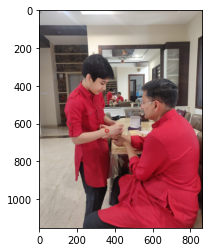

In [53]:
plt.imshow(raw_img)

In [31]:
raw_img.shape

(1152, 864, 3)

In [32]:
img = cv2.resize(raw_img, (900, 600), interpolation=cv2.INTER_AREA)
img.shape

(600, 900, 3)

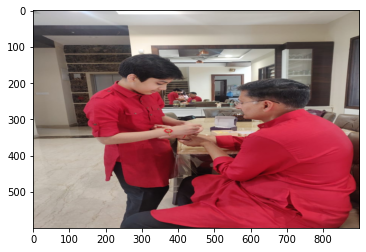

In [33]:
plt.imshow(img)

In [34]:
img_final = img.reshape(img.shape[0] * img.shape[1], 3)
img_final.shape

(540000, 3)

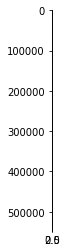

In [35]:
plt.imshow(img_final)

In [37]:
img_final

array([[111, 113, 112],
       [110, 112, 111],
       [112, 114, 113],
       ...,
       [126,  99,  82],
       [125,  98,  81],
       [125,  98,  81]], dtype=uint8)

### Kmeans Algorithm from Scratch

In [38]:
class Kmeans_from_scratch:
    def __init__(self, k, max_iter = 300, n_init = 10, random_state=0):
        self.k = k
        self.max_iter = max_iter
        self.n_init = n_init
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        self.centroids = self.init_centroids(X)
        self.labels = np.zeros(X.shape[0])
        for i in range(self.n_init):
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)

        num = 1
        while num < self.max_iter:
            centroids_old = self.centroids
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)
            if np.array_equal(centroids_old, self.centroids):
                break
            num += 1

        return self
    
    def init_centroids(self, X):
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = X[np.random.randint(X.shape[0])]
        return centroids
    
    def assign_labels(self, X):
        labels = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - self.centroids, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def update_centroids(self, X):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            new_centroids[i] = np.mean(X[self.labels == i], axis=0)
        return new_centroids

### Implementing Kmeans - sklearn

In [39]:
num_colors = int(input("Enter number of colors: "))

In [40]:
clf = KMeans(n_clusters=num_colors)
color_label = clf.fit_predict(img_final)
color_label.shape
center_colors = clf.cluster_centers_

In [55]:
clf_my = Kmeans_from_scratch(num_colors)
clf_my.fit(img_final)
color_label_my = clf_my.labels
center_colors_my = clf_my.centroids

In [41]:
color_label

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [56]:
color_label_my

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
len(color_label)

540000

In [43]:
center_colors

array([[197.57342057, 190.73614359, 181.51843112],
       [159.28483138, 142.49761241, 129.52667474],
       [ 57.67271016,  39.86228565,  40.86728356],
       [108.80638709,  91.45388373,  86.33699466],
       [182.11173156,  33.18172085,  57.13247767]])

In [57]:
center_colors_my

array([[197.92324879, 191.14564244, 181.97337797],
       [110.38108961,  92.79823525,  87.4460293 ],
       [160.31763689, 143.81025501, 130.78638049],
       [ 57.98619089,  40.22379209,  41.20716753],
       [182.11830301,  33.17766934,  57.13426998]])

In [44]:
counts = Counter(color_label)
counts

Counter({3: 61095, 1: 87388, 0: 139708, 2: 95829, 4: 155980})

In [58]:
counts_my = Counter(color_label_my)
counts_my

Counter({1.0: 61765, 2.0: 87918, 0.0: 137405, 3.0: 96965, 4.0: 155947})

In [45]:
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
hex_colors 

['#392728', '#9f8e81', '#6c5b56', '#c5beb5', '#b62139']

In [60]:
ordered_colors_my = [center_colors_my[i] for i in int(counts_my.keys())]
hex_colors_my = [rgb_to_hex(ordered_colors_my[i]) for i in int(counts_my.keys())]
hex_colors_my

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'dict_keys'

In [54]:
ordered_colors

[array([108.80638709,  91.45388373,  86.33699466]),
 array([159.28483138, 142.49761241, 129.52667474]),
 array([197.57342057, 190.73614359, 181.51843112]),
 array([57.67271016, 39.86228565, 40.86728356]),
 array([182.11173156,  33.18172085,  57.13247767])]

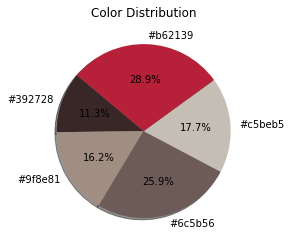

In [46]:
def show_colors_in_a_pie_chart(hex_colors):
    plt.pie(counts.values(), labels=hex_colors, colors=hex_colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title("Color Distribution")
    plt.show()

show_colors_in_a_pie_chart(hex_colors)

In [50]:
# Mark the colors in the image
img_new = img_final.copy()
img_new.shape

(540000, 3)

In [51]:
img_new

array([[111, 113, 112],
       [110, 112, 111],
       [112, 114, 113],
       ...,
       [126,  99,  82],
       [125,  98,  81],
       [125,  98,  81]], dtype=uint8)